# **Import Libraries & Load Dataset**

In [ ]:
#Import all libraries needed

from subprocess import check_output
from collections import Counter

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

from sklearn.svm import SVC

from imblearn.over_sampling import RandomOverSampler

import pickle

In [ ]:
#Warning filter
warnings.simplefilter(action ="ignore")
warnings.filterwarnings('ignore')

In [ ]:
#Download dataset
!gdown '1AzI4DZhbSWgebr6PycARcIMyUzuIf_QH'

Downloading...
From: https://drive.google.com/uc?id=1AzI4DZhbSWgebr6PycARcIMyUzuIf_QH
To: /content/fetal_health.csv
100% 229k/229k [00:00<00:00, 106MB/s]


In [ ]:
#Load Dataset
df = pd.read_csv("fetal_health.csv")

# **Exploratory Data Analysis (EDA)**

# Data Understanding

In [ ]:
#First 5 row of data
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
#Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Column description:
*   `baseline value`: Baseline Fetal Heart Rate (FHR)
*   `accelerations`: Number of accelerations per second
*   `fetal_movement`: Number of fetal movements per second
*   `uterine_contractions`: Number of uterine contractions per second
*   `light_decelerations`: Number of LDs per second
*   `severe_decelerations`: Number of SDs per second
*   `prolongued_decelerations`: Number of PDs per second
*   `abnormal_short_term_variability`: Percentage of time with abnormal short term variability
*   `mean_value_of_short_term_variability`: Mean value of short term variability
*   `percentage_of_time_with_abnormal_long_term_variability`: Percentage of time with abnormal long term variability

In [ ]:
# Data insight
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


# Count the missing and null values

In [ ]:
print("Null value:")
print(df.isnull().sum())

print("")

print("n.a. value:")
print(df.isna().sum())

Null value:
baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode              

Note:
*   No null value
*   No n.a. value



# Detecting Outliers

In [ ]:
X = df.drop(['fetal_health'], axis=1)
y = df['fetal_health']

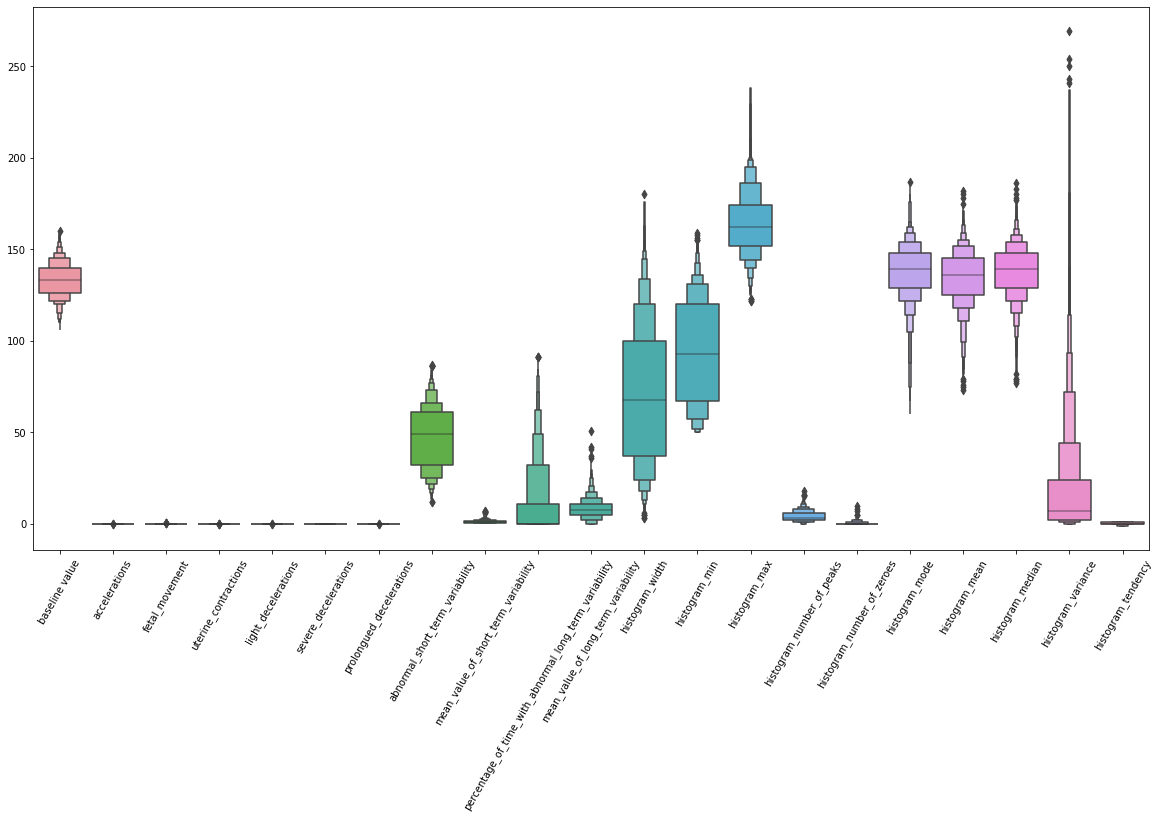

In [ ]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = X)
plt.xticks(rotation=60)
plt.show()

# Data Visualization

Histogram Plot: 


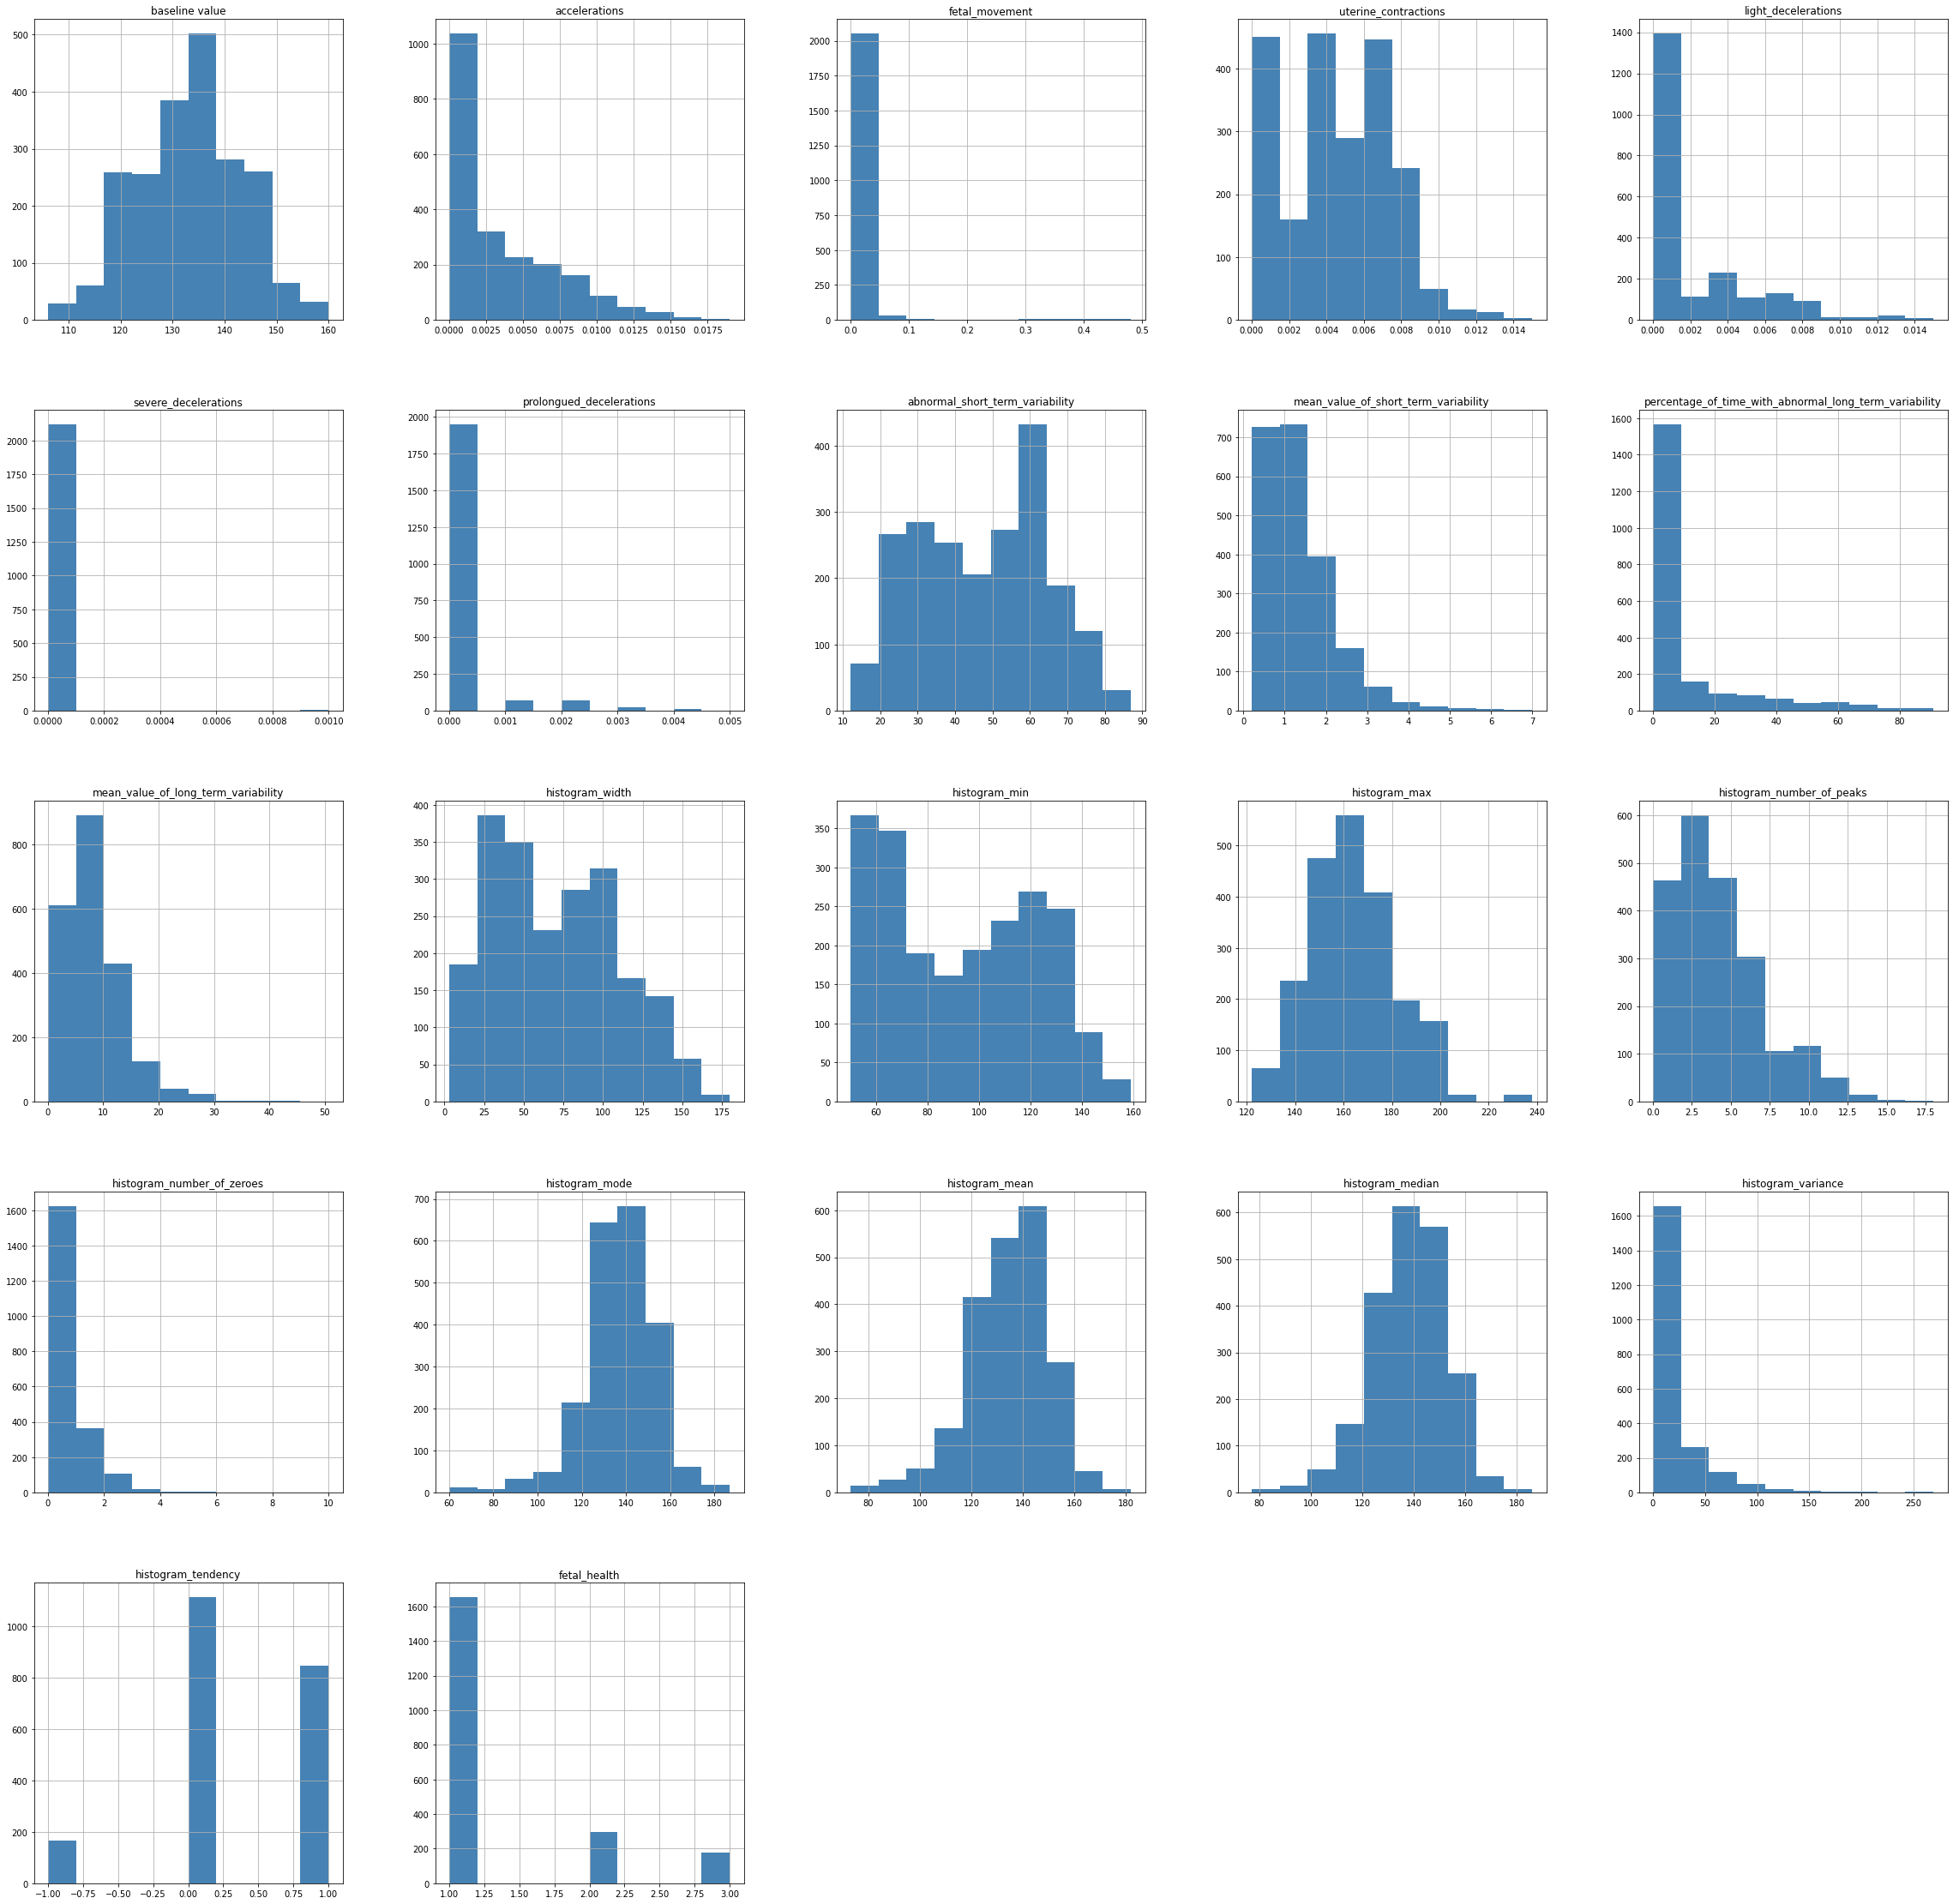

In [ ]:
#Data Visualization every column
print("Histogram Plot: ")
data_hist_plot = df.hist(figsize = (40,40), color = "steelblue")

In [ ]:
#Grouping data based on fetal_health column (mean)
grouped = df.groupby(by='fetal_health').mean()
grouped

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
fetal_health,,,,,,,,,,,,,,,,,,,,,
1.0,131.981873,0.003992,0.007963,0.004781,0.001941,6.042296e-07,0.000051,42.465861,1.430634,5.044713,...,73.400000,91.085801,164.485801,4.163142,0.335347,138.258610,135.102115,138.459819,17.479758,0.341994
2.0,141.684746,0.000275,0.008332,0.002390,0.000536,0.000000e+00,0.000095,61.901695,0.638983,29.030508,...,49.159322,113.294915,162.454237,3.311864,0.244068,146.555932,144.759322,147.071186,7.213559,0.433898
3.0,131.687500,0.000392,0.025676,0.003784,0.003670,3.409091e-05,0.001273,64.539773,1.575568,22.846591,...,78.346591,83.982955,162.329545,4.443182,0.346591,114.607955,112.977273,119.562500,50.732955,-0.073864


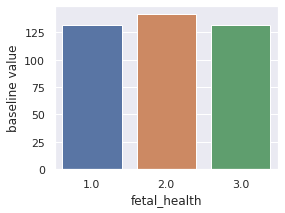

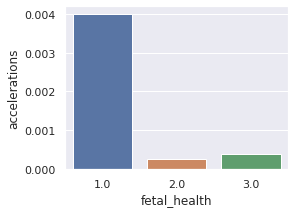

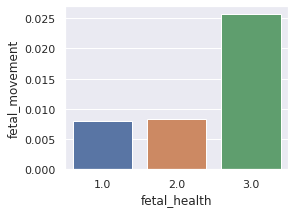

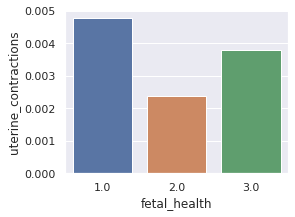

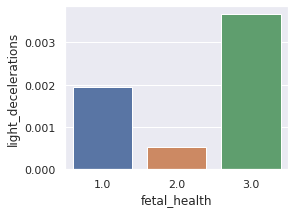

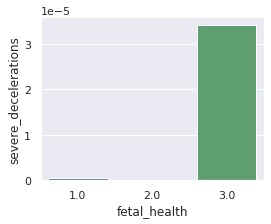

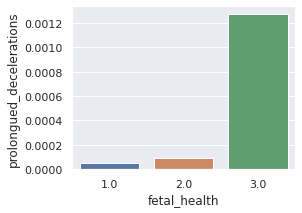

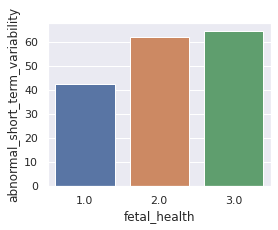

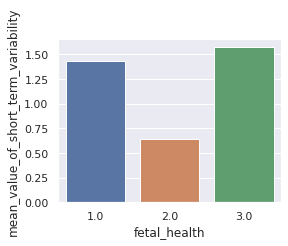

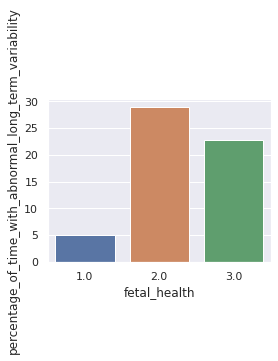

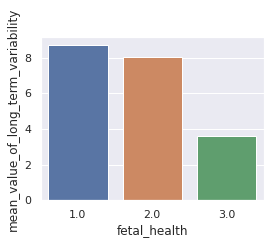

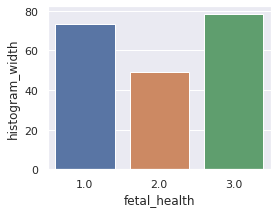

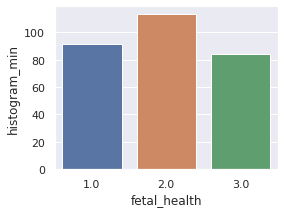

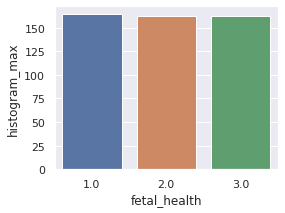

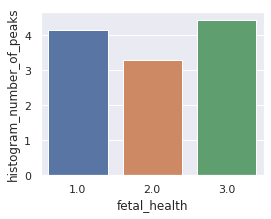

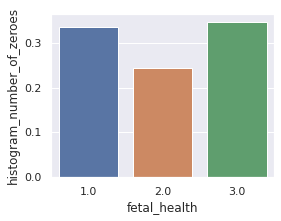

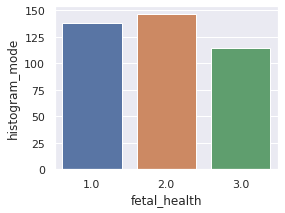

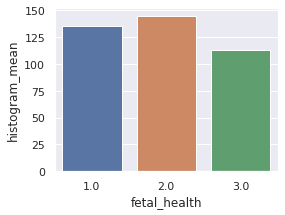

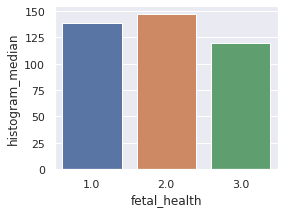

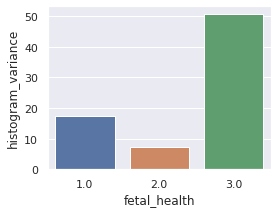

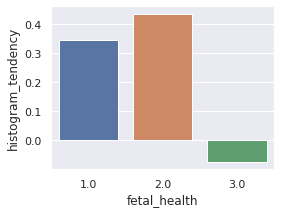

In [ ]:
#Data Visualization fetal_health vs other column
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
for index, i in enumerate(grouped.columns, start=1):
  plt.figure(figsize=(4,3))
  sns.barplot(data=grouped, x=grouped.index, y=grouped[i])
  plt.show()

# Handling Imbalanced Data on `fetal_health` column

In [ ]:
df["fetal_health"].describe()

count    2126.000000
mean        1.304327
std         0.614377
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: fetal_health, dtype: float64

`fetal_health` Column Description:
*   1.0 = Normal
*   2.0 = Suspect
*   3.0 = Pathological





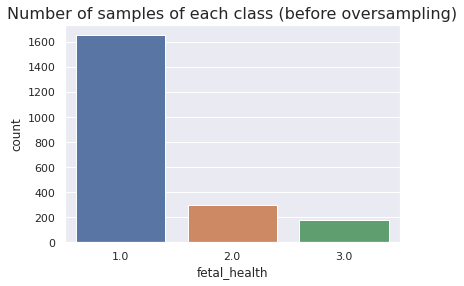

In [ ]:
sns.set_style(style='darkgrid')
sns.countplot(data=df,x='fetal_health')
plt.title("Number of samples of each class (before oversampling)", fontsize=16)
plt.show()

In [ ]:
df["fetal_health"].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [ ]:
oversample = RandomOverSampler(sampling_strategy = 'not majority')
X_over, y_over = oversample.fit_resample(X, y)

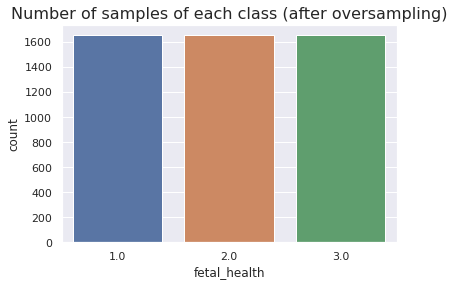

In [ ]:
sns.set_style(style='darkgrid')
sns.countplot(data=pd.DataFrame(y_over),x='fetal_health')
plt.title("Number of samples of each class (after oversampling)", fontsize=16)
plt.show()

In [ ]:
y_over.value_counts()

2.0    1655
1.0    1655
3.0    1655
Name: fetal_health, dtype: int64

# **Correlation Numeric features with output variable**

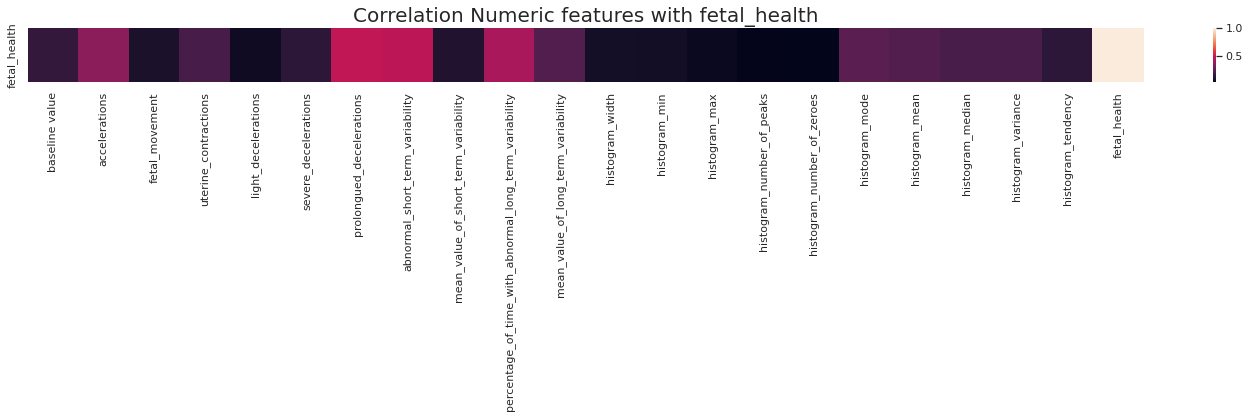

In [ ]:
numeric_data = df.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
f, ax = plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.abs().sort_values(by=["fetal_health"], ascending=False).head(1))
plt.title("Correlation Numeric features with fetal_health", fontsize=20)
plt.show()

In [ ]:
num_feature = numeric_corr["fetal_health"].abs().sort_values(ascending=False).to_frame()

cm = sns.light_palette("steelblue", as_cmap=True)

style = num_feature.style.background_gradient(cmap=cm)
style

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
accelerations,0.364066
histogram_mode,0.250412
histogram_mean,0.226985
mean_value_of_long_term_variability,0.226797
histogram_variance,0.206630
histogram_median,0.205033


Highest correlation with `fetal_health`:
1.   `prolongued_decelerations`
2.   `abnormal_short_term_variability`
3.   `percentage_of_time_with_abnormal_long_term_variability`

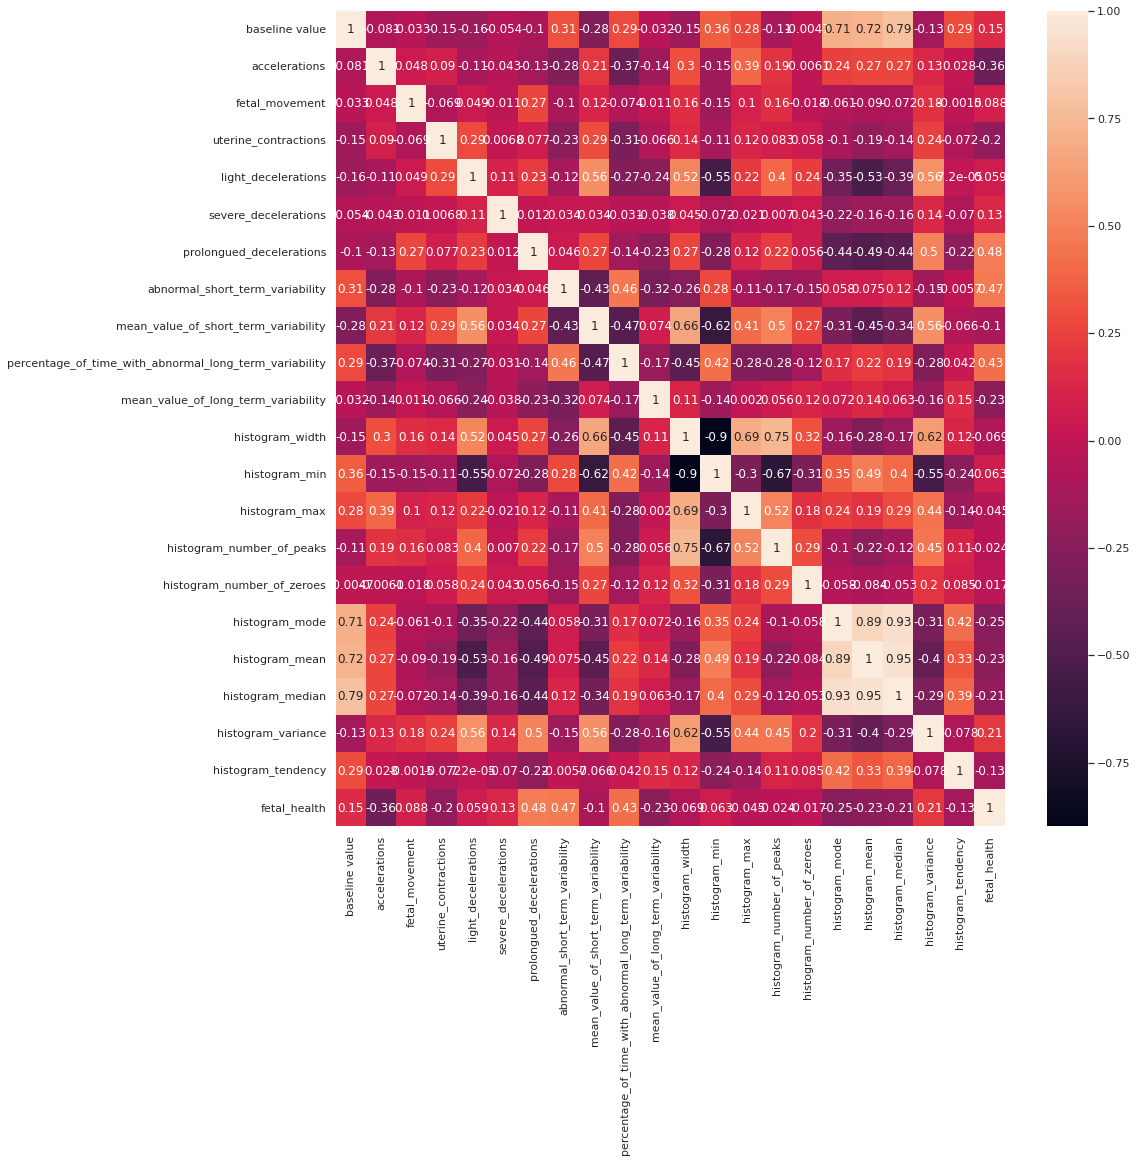

In [ ]:
#Heatmap creating
plt.figure(figsize=(15,15))  
sns.heatmap(df.corr(), annot=True)

# **Train Test Split & Cross-validation**

In [ ]:
x_balanced = X_over[['baseline value',
           'accelerations',
           'fetal_movement',
           'uterine_contractions',
           'light_decelerations',
           'severe_decelerations',
           'prolongued_decelerations',
           'abnormal_short_term_variability',
           'mean_value_of_short_term_variability',
           'percentage_of_time_with_abnormal_long_term_variability',
           'mean_value_of_long_term_variability',
           'histogram_width',
           'histogram_min',
           'histogram_max',
           'histogram_number_of_peaks',
           'histogram_number_of_zeroes',
           'histogram_mode',
           'histogram_mean',
           'histogram_median',
           'histogram_variance',
           'histogram_tendency']]

y_balanced = y_over

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_balanced, 
                                                    y_balanced, 
                                                    test_size=0.2, 
                                                    random_state=42) #not using stratify=y

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3972, 21), (993, 21), (3972,), (993,))

In [ ]:
#Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

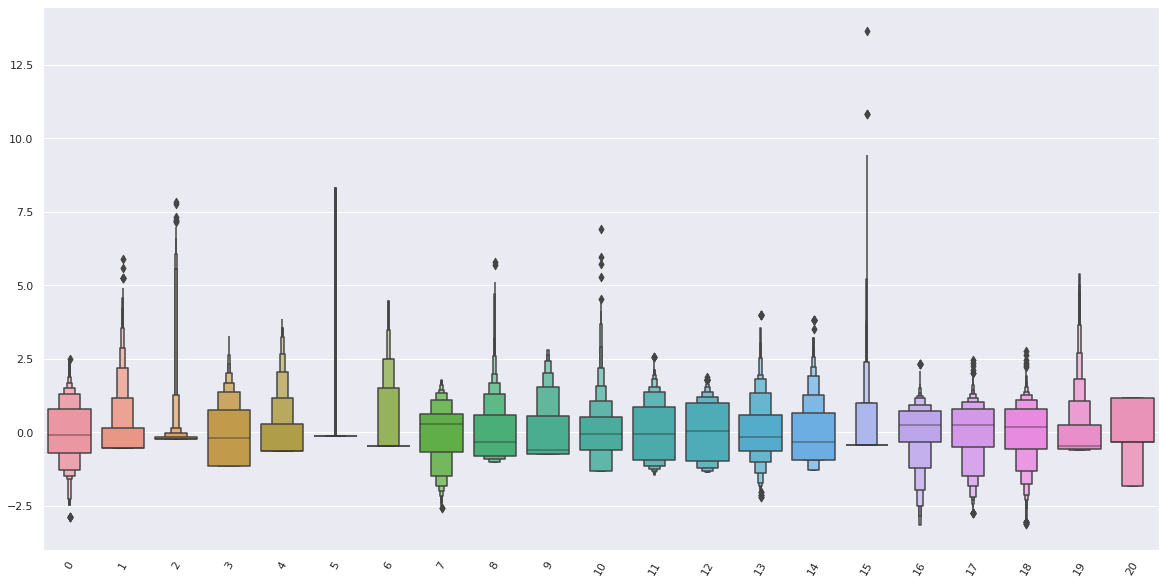

In [ ]:
#Detecting outliers after split & normalize (train)
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_train)
plt.xticks(rotation=60)
plt.show()

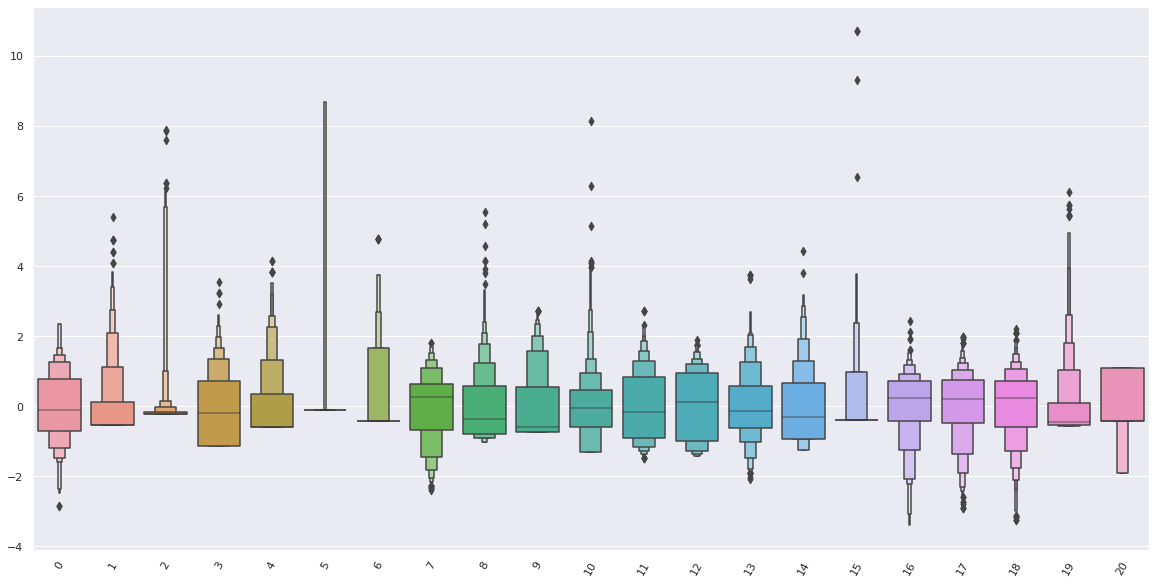

In [ ]:
#Detecting outliers after split & normalize (test)
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_test)
plt.xticks(rotation=60)
plt.show()

# **Machine Learning Models**

1. Gradient Boosting Machine (GBM)
2. K-nearest neighbors (KNN)
3. Logistic Regression (LR)
4. Random Forest (RF)
5. Support Vector Machine (SVM)

**Grid Search & CV Method**

**Grid Search** is a tuning technique that attempts to compute the optimum values of hyperparameters. It is an exhaustive search that is performed on a the specific parameter values of a model.

To accelerate Grid Search, we use **Cross Validation** (CV) method with n_splits=3 & n_jobs=2

In [ ]:
cv_method = StratifiedKFold(n_splits=3,
                            shuffle=True,
                            random_state=42
                            )

**Define Learning Curve**

In [ ]:
def plot_learning_curve(estimator, 
                        title, 
                        x, 
                        y, 
                        ylim=None, 
                        cv=None,
                        n_jobs=-1, 
                        train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                            x, 
                                                            y, 
                                                            cv=cv, 
                                                            n_jobs=n_jobs, 
                                                            train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#80CBC4",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#00897B",
             label="Cross-validation score")

    plt.legend(loc="best")
    
    return plt

# 1. Gradient Boosting classifier (GBC)

In [ ]:
#Default parameters
gbc = GradientBoostingClassifier(random_state=42)
gbc_mod = gbc.fit(X_train, y_train)
score_gbc_test_before = gbc_mod.score(X_test,y_test)
print(f"Gradient Boosting Classifier default: {(score_gbc_test_before)}")

pred_gbc = gbc_mod.predict(X_test)

Gradient Boosting Classifier default: 0.9446122860020141


Tuning parameters

In [ ]:
#Cross validate
scores_GBC = cross_val_score(gbc,
                             X_train,
                             y_train,
                             cv=cv_method,
                             n_jobs=-1,
                             scoring="accuracy"
                             )

print(f"Scores(Cross validate) for Gradient Boosting Classifier model:\n{scores_GBC}")
print(f"CrossValMeans: {round(scores_GBC.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_GBC.std(), 3)}")

Scores(Cross validate) for Gradient Boosting Classifier model:
[0.98187311 0.96374622 0.97507553]
CrossValMeans: 0.974
CrossValStandard Deviation: 0.007


Hyperparameter Tuning

In [ ]:
params_GBC = {"loss": ["deviance"],
              "learning_rate": [0.25, 0.5, 0.75, 1], 
              "n_estimators": [250, 500],
              "max_depth": [3, 5, 8]
              }

In [ ]:
GridSearchCV_GBC = GridSearchCV(estimator=gbc,
                                param_grid=params_GBC,
                                cv=cv_method,
                                verbose=1,
                                n_jobs=-1,
                                scoring="accuracy",
                                return_train_score=True
                                )

In [ ]:
#Fit model with data train
GridSearchCV_GBC.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.25, 0.5, 0.75, 1],
                         'loss': ['deviance'], 'max_depth': [3, 5, 8],
                         'n_estimators': [250, 500]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
#Best estimator
best_estimator_GBC = GridSearchCV_GBC.best_estimator_
print(best_estimator_GBC)

GradientBoostingClassifier(learning_rate=1, max_depth=5, n_estimators=250,
                           random_state=42)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

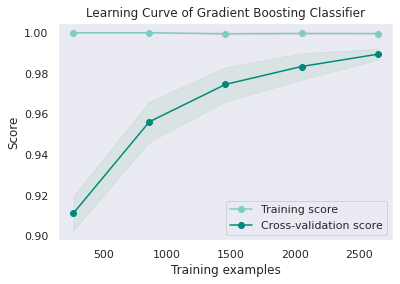

In [ ]:
# Gradient Boosting Classifier learning curve (Training examples x Score)
plot_learning_curve(GridSearchCV_GBC.best_estimator_,
                    title = "Learning Curve of Gradient Boosting Classifier",
                    x = X_train,
                    y = y_train,
                    cv = cv_method
                    )

In [ ]:
#Best params
best_params_GBC = GridSearchCV_GBC.best_params_
print(best_params_GBC)

{'learning_rate': 1, 'loss': 'deviance', 'max_depth': 5, 'n_estimators': 250}


In [ ]:
print(f"Best score for GBC model: {round(GridSearchCV_GBC.best_score_, 3)}")

Best score for GBC model: 0.989


In [ ]:
# Grid Search return the best paramters
gbc = GradientBoostingClassifier(loss=GridSearchCV_GBC.best_estimator_.get_params()['loss'],
                                 learning_rate=GridSearchCV_GBC.best_estimator_.get_params()['learning_rate'],
                                 n_estimators=GridSearchCV_GBC.best_estimator_.get_params()['n_estimators'],
                                 max_depth=GridSearchCV_GBC.best_estimator_.get_params()['max_depth'],
                                 random_state=42
                                 )
gbc_mod = gbc.fit(X_train, y_train)
pred_gbc = gbc_mod.predict(X_test)

mse_gbc = mean_squared_error(y_test,pred_gbc)
rmse_gbc = np.sqrt(mean_squared_error(y_test,pred_gbc))
score_gbc_train = gbc_mod.score(X_train,y_train)
score_gbc_test = gbc_mod.score(X_test,y_test)

In [ ]:
print(f"Mean Square Error for Gradient Boosting Classifier = {round(mse_gbc, 3)}")
print(f"Root Mean Square Error for Gradient Boosting Classifier = {round(rmse_gbc, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_gbc_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_gbc_test, 3)}")

Mean Square Error for Gradient Boosting Classifier = 0.043
Root Mean Square Error for Gradient Boosting Classifier = 0.208
R^2(coefficient of determination) on training set = 0.999
R^2(coefficient of determination) on testing set = 0.96


Model Performance Analysis

In [ ]:
# print classification report
print("Classification Report Testing Model (Gradient Boosting Classifier):")
print(classification_report(y_test, pred_gbc))

Classification Report Testing Model (Gradient Boosting Classifier):
              precision    recall  f1-score   support

         1.0       0.98      0.95      0.97       353
         2.0       0.91      0.97      0.94       317
         3.0       0.99      0.95      0.97       323

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.96      0.96       993



In [ ]:
# form confusion matrix as a DataFrame
confusion_matrix_gbc = pd.DataFrame((confusion_matrix(y_test, pred_gbc)))

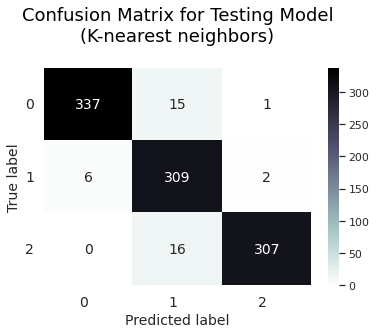

In [ ]:
# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gbc, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(K-nearest neighbors)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# 2. K-nearest neighbors (KNN)

In [ ]:
#Default parameters
knn = KNeighborsClassifier()
knn_mod = knn.fit(X_train, y_train)
score_knn_test_before = knn_mod.score(X_test,y_test)
print(f"K-nearest neighbors default: {(score_knn_test_before)}")

pred_knn = knn_mod.predict(X_test)

K-nearest neighbors default: 0.9436052366565961


Tuning parameters

In [ ]:
#Cross validate
scores_knn = cross_val_score(knn,
                             X_train,
                             y_train,
                             cv=cv_method,
                             n_jobs=-1,
                             scoring="accuracy")

print(f"Scores(Cross validate) for K-Nearest Neighbors model:\n{scores_knn}")
print(f"CrossValMeans: {round(scores_knn.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_knn.std(), 3)}")

Scores(Cross validate) for K-Nearest Neighbors model:
[0.95015106 0.9358006  0.93504532]
CrossValMeans: 0.94
CrossValStandard Deviation: 0.007


Hyperparameter Tuning

In [ ]:
params_knn = {"leaf_size": list(range(1,10)),
              "n_neighbors": list(range(1,10)),
              "p": [1,2]
              }

In [ ]:
GridSearchCV_knn = GridSearchCV(estimator=knn,
                               param_grid=params_knn,
                               cv=cv_method,
                               verbose=1,
                               n_jobs=-1,
                               scoring="accuracy",
                               return_train_score=True
                               )

In [ ]:
#Fit model with data train
GridSearchCV_knn.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'p': [1, 2]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
#Best estimator
best_estimator_knn = GridSearchCV_knn.best_estimator_
print(best_estimator_knn)

KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

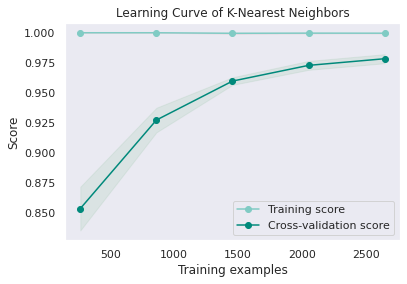

In [ ]:
# K-Nearest Neighbors learning curve (Training examples x Score)
plot_learning_curve(GridSearchCV_knn.best_estimator_,
                    title = "Learning Curve of K-Nearest Neighbors",
                    x = X_train,
                    y = y_train,
                    cv = cv_method
                    )

In [ ]:
#Best params
best_params_knn = GridSearchCV_knn.best_params_
print(best_params_knn)

{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}


In [ ]:
print(f"Best score for KNN model: {round(GridSearchCV_knn.best_score_, 3)}")

Best score for KNN model: 0.978


In [ ]:
# Grid Search return the best paramters
knn = KNeighborsClassifier(leaf_size=GridSearchCV_knn.best_estimator_.get_params()['leaf_size'], 
                           n_neighbors=GridSearchCV_knn.best_estimator_.get_params()['n_neighbors'], 
                           p=GridSearchCV_knn.best_estimator_.get_params()['p'],
                           algorithm=GridSearchCV_knn.best_estimator_.get_params()['algorithm']
                           ) #NOT using random state
knn_mod = knn.fit(X_train, y_train)
pred_knn = knn_mod.predict(X_test)

mse_knn = mean_squared_error(y_test,pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test,pred_knn))
score_knn_train = knn_mod.score(X_train,y_train)
score_knn_test = knn_mod.score(X_test,y_test)

In [ ]:
print(f"Mean Square Error for K-nearest neighbors = {round(mse_knn, 3)}")
print(f"Root Mean Square Error for K-nearest neighbors = {round(rmse_knn, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_knn_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_knn_test, 3)}")

Mean Square Error for K-nearest neighbors = 0.03
Root Mean Square Error for K-nearest neighbors = 0.174
R^2(coefficient of determination) on training set = 0.999
R^2(coefficient of determination) on testing set = 0.973


Model Performance Analysis

In [ ]:
# print classification report
print("Classification Report Testing Model (K-nearest neighbors):")
print(classification_report(y_test, pred_knn))

Classification Report Testing Model (K-nearest neighbors):
              precision    recall  f1-score   support

         1.0       1.00      0.93      0.96       353
         2.0       0.93      1.00      0.96       317
         3.0       1.00      1.00      1.00       323

    accuracy                           0.97       993
   macro avg       0.97      0.97      0.97       993
weighted avg       0.97      0.97      0.97       993



In [ ]:
# form confusion matrix as a DataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, pred_knn)))

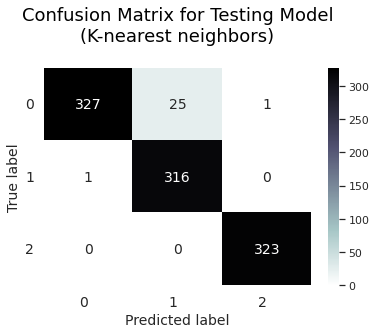

In [ ]:
# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(K-nearest neighbors)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# 3. Logistic Regression (LR)

In [ ]:
#Default parameters
logistic_regression = linear_model.LogisticRegression(random_state=42)
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
score_logistic_regression_test_before = logistic_regression_mod.score(X_test,y_test)
print(f"Logistic Regression default: {(score_logistic_regression_test_before)}")

pred_logistic_regression = logistic_regression_mod.predict(X_test)

Logistic Regression default: 0.8580060422960725


Tuning parameters

In [ ]:
#Cross validate
scores_Logistic = cross_val_score(logistic_regression, 
                                  X_train, 
                                  y_train, 
                                  cv=cv_method, 
                                  n_jobs=-1, 
                                  scoring="accuracy")

print(f"Scores(Cross validate) for Logistic Regression model:\n{scores_Logistic}")
print(f"CrossValMeans: {round(scores_Logistic.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_Logistic.std(), 3)}")

Scores(Cross validate) for Logistic Regression model:
[0.8723565  0.87084592 0.85876133]
CrossValMeans: 0.867
CrossValStandard Deviation: 0.006


Hyperparameter Tuning

In [ ]:
params_LR = {"tol": [0.0001, 0.0002, 0.0003],
             "C": [0.001, 0.01, 0.1, 1, 10, 100],
             "intercept_scaling": [1, 2, 3, 4],
             "max_iter":[30,50,70,150,200,300,400,500,700,1200,1500],
             "penalty": ['l2', 'l1', 'elasticnet']
             }

In [ ]:
GridSearchCV_LR = GridSearchCV(estimator=logistic_regression,
                               param_grid=params_LR,
                               cv=cv_method,
                               verbose=1,
                               n_jobs=-1,
                               scoring="accuracy",
                               return_train_score=True
                               )

In [ ]:
#Fit model with data train
GridSearchCV_LR.fit(X_train, y_train)

Fitting 3 folds for each of 2376 candidates, totalling 7128 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'intercept_scaling': [1, 2, 3, 4],
                         'max_iter': [30, 50, 70, 150, 200, 300, 400, 500, 700,
                                      1200, 1500],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'tol': [0.0001, 0.0002, 0.0003]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
#Best estimator
best_estimator_LR = GridSearchCV_LR.best_estimator_
print(best_estimator_LR)

LogisticRegression(C=0.1, max_iter=30, random_state=42)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

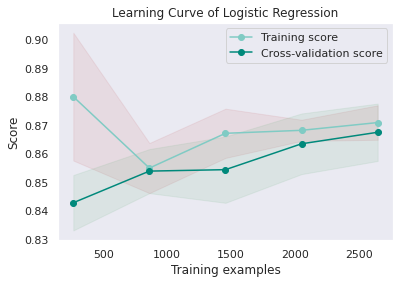

In [ ]:
# Logistic Regression learning curve (Training examples x Score)
plot_learning_curve(GridSearchCV_LR.best_estimator_,
                    title="Learning Curve of Logistic Regression",
                    x=X_train,
                    y=y_train,
                    cv=cv_method
                    )

In [ ]:
#Best params
best_params_LR = GridSearchCV_LR.best_params_
print(best_params_LR)

{'C': 0.1, 'intercept_scaling': 1, 'max_iter': 30, 'penalty': 'l2', 'tol': 0.0001}


In [ ]:
print(f"Best score for LR model: {round(GridSearchCV_LR.best_score_, 3)}")

Best score for LR model: 0.868


In [ ]:
# Grid Search return the best paramters
logistic_regression = linear_model.LogisticRegression(C=GridSearchCV_LR.best_estimator_.get_params()['C'],
                                                      intercept_scaling=GridSearchCV_LR.best_estimator_.get_params()['intercept_scaling'],
                                                      tol=GridSearchCV_LR.best_estimator_.get_params()['tol'],
                                                      max_iter=GridSearchCV_LR.best_estimator_.get_params()['max_iter'],
                                                      penalty=GridSearchCV_LR.best_estimator_.get_params()['penalty'],
                                                      solver="liblinear",
                                                      random_state=42 #using random state
                                                      )
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
pred_logistic_regression = logistic_regression_mod.predict(X_test)

mse_logistic_regression = mean_squared_error(y_test,pred_logistic_regression)
rmse_logistic_regression = np.sqrt(mean_squared_error(y_test,pred_logistic_regression))
score_logistic_regression_train = logistic_regression_mod.score(X_train,y_train)
score_logistic_regression_test = logistic_regression_mod.score(X_test,y_test)

In [ ]:
print(f"Mean Square Error for Logistic Regression = {round(mse_logistic_regression, 3)}")
print(f"Root Mean Square Error for Logistic Regression = {round(rmse_logistic_regression, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_logistic_regression_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_logistic_regression_test, 3)}")

Mean Square Error for Logistic Regression = 0.185
Root Mean Square Error for Logistic Regression = 0.43
R^2(coefficient of determination) on training set = 0.859
R^2(coefficient of determination) on testing set = 0.845


Model Performance Analysis

In [ ]:
# print classification report
print("Classification Report Testing Model (Logistic Regression):")
print(classification_report(y_test, pred_logistic_regression))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

         1.0       0.96      0.84      0.90       353
         2.0       0.75      0.83      0.79       317
         3.0       0.84      0.87      0.86       323

    accuracy                           0.84       993
   macro avg       0.85      0.85      0.85       993
weighted avg       0.85      0.84      0.85       993



In [ ]:
# form confusion matrix as a DataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, pred_logistic_regression)))

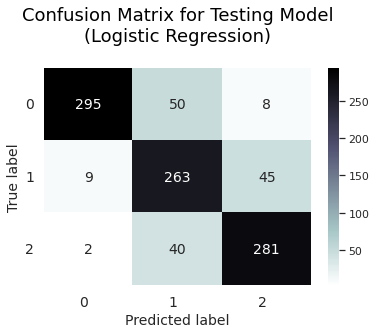

In [ ]:
# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# 4. Random Forest (RF)

In [ ]:
#Default parameters
random_forest = RandomForestClassifier(random_state=42)
random_forest_mod = random_forest.fit(X_train, y_train)
score_random_forest_test_before = random_forest_mod.score(X_test,y_test)
print(f"Random Forest default: {(score_random_forest_test_before)}")

pred_random_forest = random_forest_mod.predict(X_test)

Random Forest default: 0.9707955689828801


Tuning parameters

In [ ]:
#Cross validate
scores_random_forest = cross_val_score(random_forest,
                                       X_train,
                                       y_train,
                                       cv=cv_method,
                                       n_jobs=-1,
                                       scoring="accuracy"
                                       )

print(f"Scores(Cross validate) for Random Forest model:\n{scores_random_forest}")
print(f"CrossValMeans: {round(scores_random_forest.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_random_forest.std(), 3)}")

Scores(Cross validate) for Random Forest model:
[0.98640483 0.97734139 0.98564955]
CrossValMeans: 0.983
CrossValStandard Deviation: 0.004


Hyperparameter Tuning

In [ ]:
params_random_forest = {"min_samples_split": [2, 6, 20],
                        "min_samples_leaf": [1, 4, 16],
                        "n_estimators" :[100,200,300,400],
                        "criterion": ["gini","entropy"],
                        "max_features": ['auto', 'sqrt', 'log2']
                        }

In [ ]:
GridSearchCV_random_forest = GridSearchCV(estimator=random_forest,
                                          param_grid=params_random_forest,
                                          cv=cv_method,
                                          verbose=1,
                                          n_jobs=-1,
                                          scoring="accuracy",
                                          return_train_score=True
                                          )

In [ ]:
#Fit model with data train
GridSearchCV_random_forest.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 4, 16],
                         'min_samples_split': [2, 6, 20],
                         'n_estimators': [100, 200, 300, 400]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
#Best estimator
best_estimator_random_forest = GridSearchCV_random_forest.best_estimator_
print(best_estimator_random_forest)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=42)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

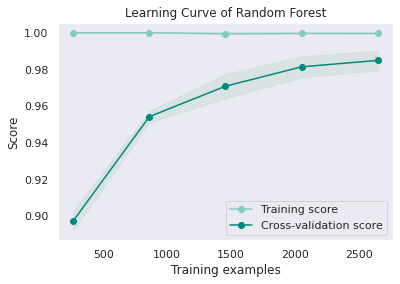

In [ ]:
# Random Forest learning curve (Training examples x Score)
plot_learning_curve(GridSearchCV_random_forest.best_estimator_,
                    title = "Learning Curve of Random Forest",
                    x = X_train,
                    y = y_train,
                    cv = cv_method
                    )

In [ ]:
#Best params
best_params_random_forest = GridSearchCV_random_forest.best_params_
print(best_params_random_forest)

{'criterion': 'entropy', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
print(f"Best score for RF model: {round(GridSearchCV_random_forest.best_score_, 3)}")

Best score for RF model: 0.985


In [ ]:
# Grid Search return the best paramters
random_forest = RandomForestClassifier(criterion=GridSearchCV_random_forest.best_estimator_.get_params()['criterion'], 
                                       n_estimators=GridSearchCV_random_forest.best_estimator_.get_params()['n_estimators'], 
                                       min_samples_leaf=GridSearchCV_random_forest.best_estimator_.get_params()['min_samples_leaf'], 
                                       min_samples_split=GridSearchCV_random_forest.best_estimator_.get_params()['min_samples_split'],
                                       max_features=GridSearchCV_random_forest.best_estimator_.get_params()['max_features'],
                                       random_state=42)
random_forest_mod = random_forest.fit(X_train, y_train)
pred_random_forest = random_forest_mod.predict(X_test)

mse_random_forest = mean_squared_error(y_test,pred_random_forest)
rmse_random_forest = np.sqrt(mean_squared_error(y_test,pred_random_forest))
score_random_forest_train = random_forest_mod.score(X_train,y_train)
score_random_forest_test = random_forest_mod.score(X_test,y_test)

In [ ]:
print(f"Mean Square Error for Random Forest = {round(mse_random_forest, 3)}")
print(f"Root Mean Square Error for Random Forest = {round(rmse_random_forest, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_random_forest_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_random_forest_test, 3)}")

Mean Square Error for Random Forest = 0.034
Root Mean Square Error for Random Forest = 0.185
R^2(coefficient of determination) on training set = 0.999
R^2(coefficient of determination) on testing set = 0.969


Model Performance Analysis

In [ ]:
# print classification report
print("Classification Report Testing Model (Random Forest):")
print(classification_report(y_test, pred_random_forest))

Classification Report Testing Model (Random Forest):
              precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       353
         2.0       0.92      0.99      0.95       317
         3.0       1.00      0.97      0.98       323

    accuracy                           0.97       993
   macro avg       0.97      0.97      0.97       993
weighted avg       0.97      0.97      0.97       993



In [ ]:
# form confusion matrix as a DataFrame
confusion_matrix_random_forest = pd.DataFrame((confusion_matrix(y_test, pred_random_forest)))

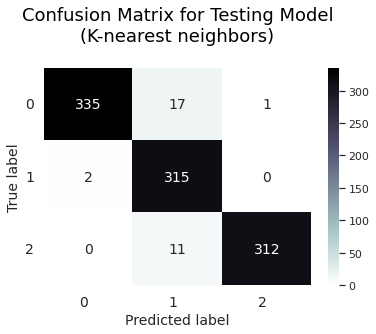

In [ ]:
# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_random_forest, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(K-nearest neighbors)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# 5. Support Vector Machine (SVM)

In [ ]:
#Default parameters
svm = SVC(random_state=42)
svm_mod = svm.fit(X_train, y_train)
score_svm_test_before = svm_mod.score(X_test,y_test)
print(f"Support Vector Machine default: {(score_svm_test_before)}")

pred_svm = svm_mod.predict(X_test)

Support Vector Machine default: 0.9284994964753273


Tuning parameters

In [ ]:
#Cross validate
scores_svm = cross_val_score(svm,
                             X_train,
                             y_train,
                             cv=cv_method,
                             n_jobs=-1,
                             scoring="accuracy"
                             )

print(f"Scores(Cross validate) for Support Vector Machine model:\n{scores_svm}")
print(f"CrossValMeans: {round(scores_svm.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_svm.std(), 3)}")

Scores(Cross validate) for Support Vector Machine model:
[0.94033233 0.92749245 0.91389728]
CrossValMeans: 0.927
CrossValStandard Deviation: 0.011


Hyperparameter Tuning

In [ ]:
params_svm = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100]
              }

In [ ]:
GridSearchCV_svm = GridSearchCV(estimator=svm,
                                param_grid=params_svm,
                                cv=cv_method,
                                verbose=1,
                                n_jobs=-1,
                                scoring="accuracy",
                                return_train_score=True
                                )

In [ ]:
#Fit model with data train
GridSearchCV_svm.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
#Best estimator
best_estimator_svm = GridSearchCV_svm.best_estimator_
print(best_estimator_svm)

SVC(C=100, gamma=1, random_state=42)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

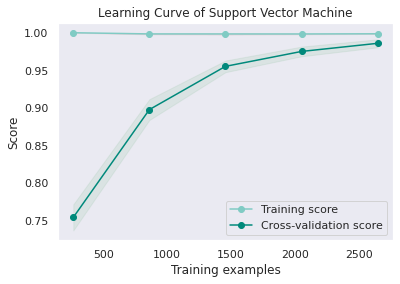

In [ ]:
# Support Vector Machine learning curve (Training examples x Score)
plot_learning_curve(GridSearchCV_svm.best_estimator_,
                    title = "Learning Curve of Support Vector Machine",
                    x = X_train,
                    y = y_train,
                    cv = cv_method
                    )

In [ ]:
#Best params
best_params_svm = GridSearchCV_svm.best_params_
print(best_params_svm)

{'C': 100, 'gamma': 1}


In [ ]:
print(f"Best score for SVC model: {round(GridSearchCV_svm.best_score_, 3)}")

Best score for SVC model: 0.986


In [ ]:
# Grid Search return the best paramters
svm = SVC(C=GridSearchCV_svm.best_estimator_.get_params()['C'],
          gamma=GridSearchCV_svm.best_estimator_.get_params()['gamma'],
          random_state=42
          )
svm_mod = svm.fit(X_train, y_train)
pred_svm = svm_mod.predict(X_test)

mse_svm = mean_squared_error(y_test,pred_svm)
rmse_svm = np.sqrt(mean_squared_error(y_test,pred_svm))
score_svm_train = svm_mod.score(X_train,y_train)
score_svm_test = svm_mod.score(X_test,y_test)

In [ ]:
print(f"Mean Square Error for Support Vector Machine = {round(mse_svm, 3)}")
print(f"Root Mean Square Error for Support Vector Machine = {round(rmse_svm, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_svm_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_svm_test, 3)}")

Mean Square Error for Support Vector Machine = 0.014
Root Mean Square Error for Support Vector Machine = 0.119
R^2(coefficient of determination) on training set = 0.998
R^2(coefficient of determination) on testing set = 0.986


Model Performance Analysis

In [ ]:
# print classification report
print("Classification Report Testing Model (Support Vector Machine):")
print(classification_report(y_test, pred_svm))

Classification Report Testing Model (Support Vector Machine):
              precision    recall  f1-score   support

         1.0       1.00      0.97      0.98       353
         2.0       0.96      1.00      0.98       317
         3.0       1.00      1.00      1.00       323

    accuracy                           0.99       993
   macro avg       0.99      0.99      0.99       993
weighted avg       0.99      0.99      0.99       993



In [ ]:
# form confusion matrix as a DataFrame
confusion_matrix_svm = pd.DataFrame((confusion_matrix(y_test, pred_svm)))

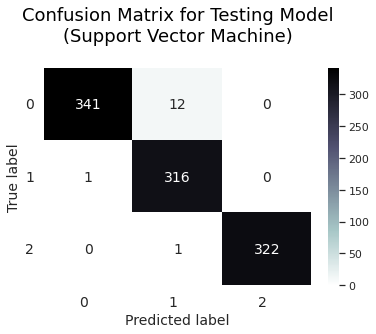

In [ ]:
# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_svm, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Support Vector Machine)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# **Model Selection**

In [ ]:
results = pd.DataFrame([["Gradient Boosting classifier", 
                         score_gbc_train, 
                         score_gbc_test, 
                         abs(score_gbc_train-score_gbc_test)],
                        ["K-nearest neighbors", 
                         score_knn_train, 
                         score_knn_test, 
                         abs(score_knn_train-score_knn_test)],
                        ["Logistic Regression", 
                         score_logistic_regression_train, 
                         score_logistic_regression_test, 
                         abs(score_logistic_regression_train-score_logistic_regression_test)],
                        ["Random Forest", 
                         score_random_forest_train, 
                         score_random_forest_test, 
                         abs(score_random_forest_train-score_random_forest_test)],
                        ["Support Vector Machine", 
                         score_svm_train, 
                         score_svm_test, 
                         abs(score_svm_train-score_svm_test)]],
                       columns = ["Models", 
                                  "Training Score", 
                                  "Testing Score", 
                                  "Error"])

results.sort_values(by=['Training Score', 'Testing Score'], ascending=False).style.background_gradient(cmap='Blues')

,Models,Training Score,Testing Score,Error
1,K-nearest neighbors,0.999496,0.972810,0.026687
3,Random Forest,0.999496,0.968781,0.030715
0,Gradient Boosting classifier,0.999496,0.959718,0.039778
4,Support Vector Machine,0.998489,0.985901,0.012588
2,Logistic Regression,0.858761,0.844914,0.013847


Conclusion:

**K-nearest neighbors** has the highest training score & testing score among the others model. This shows that the K-nearest neighbors is the most suitable model to predict this fetal_health.csv dataset. But, other models can still be optimized using more precise tuning parameters.

In [ ]:
tune = pd.DataFrame([["Gradient Boosting classifier", 
                         score_gbc_test_before, 
                         score_gbc_test, 
                         (score_gbc_test-score_gbc_test_before)],
                        ["K-nearest neighbors", 
                         score_knn_test_before, 
                         score_knn_test, 
                         (score_knn_test-score_knn_test_before)],
                        ["Logistic Regression", 
                         score_logistic_regression_test_before, 
                         score_logistic_regression_test, 
                         (score_logistic_regression_test-score_logistic_regression_test_before)],
                        ["Random Forest", 
                         score_random_forest_test_before, 
                         score_random_forest_test, 
                         (score_random_forest_test-score_random_forest_test_before)],
                        ["Support Vector Machine", 
                         score_svm_test_before, 
                         score_svm_test, 
                         (score_svm_test-score_svm_test_before)]],
                       columns = ["Models", 
                                  "Testing Score Before Tuning Parameters", 
                                  "Testing Score After Tuning Parameters", 
                                  "Diff"])

tune.sort_values(by=['Diff'], ascending=False).style.background_gradient(cmap='Blues')

,Models,Testing Score Before Tuning Parameters,Testing Score After Tuning Parameters,Diff
4,Support Vector Machine,0.928499,0.985901,0.057402
1,K-nearest neighbors,0.943605,0.972810,0.029204
0,Gradient Boosting classifier,0.944612,0.959718,0.015106
3,Random Forest,0.970796,0.968781,-0.002014
2,Logistic Regression,0.858006,0.844914,-0.013092


# **Saving Model**

Selected model: K-nearest neighbors

In [ ]:
with open('FetalHealthClassificationFinal','wb') as f:
    pickle.dump(knn,f)